In [1]:
import librosa
import numpy as np
import IPython.display as ipd

# air_conditioner
# audio = '../raw/audio/fold5/100852-0-0-0.wav'

# air_conditioner_with_birds
# audio = '../raw/audio/fold9/101729-0-0-1.wav'

# car_horn
# audio = '../raw/audio/fold10/100648-1-4-0.wav'

# dog_bark
audio = '../raw/audio/fold2/100652-3-0-0.wav'

ipd.Audio(audio)

def get_features(source):
    y, sr = librosa.load(source, duration = 2.97)
    ps = librosa.feature.melspectrogram(
        y = y, # audio time-series
        sr = sr, # sample rate normaly 22050
        # norm = 1, # normalize
        n_fft = 1024, # length of the FFT window
        hop_length = 512, # number of samples between successive frames
        n_mels = 128, # number of Mel bands to generate
    )
    print('Shape of the feature:', ps.shape)
    return ps

features = get_features(audio)

Shape of the feature: (128, 128)


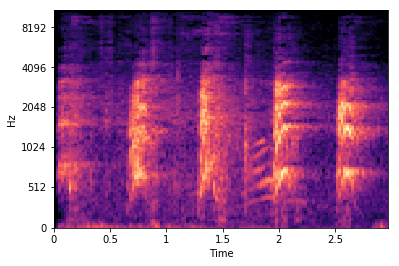

In [3]:
import matplotlib.pyplot as plt
import librosa.display

librosa.display.specshow(
    librosa.power_to_db(features, ref = np.max),
    x_axis = 'time',
    y_axis = 'mel'
)
plt.show()

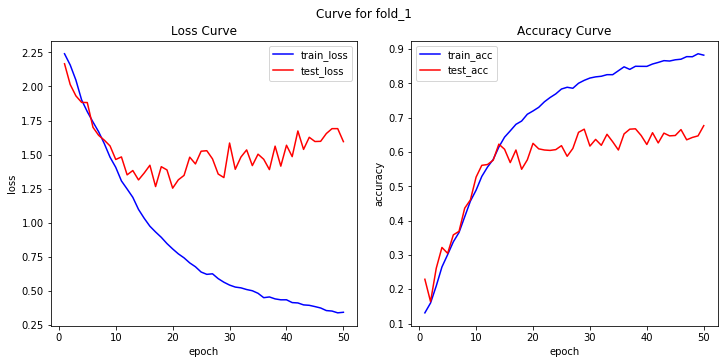

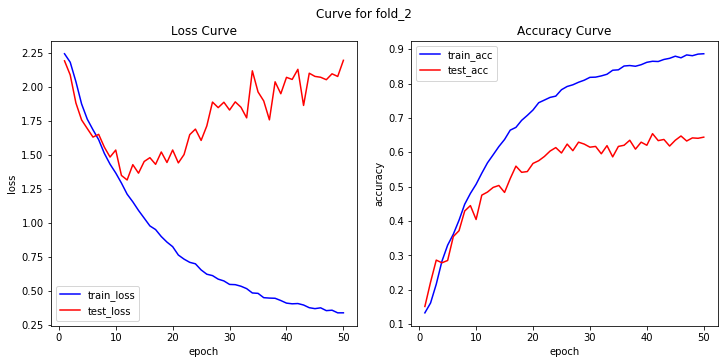

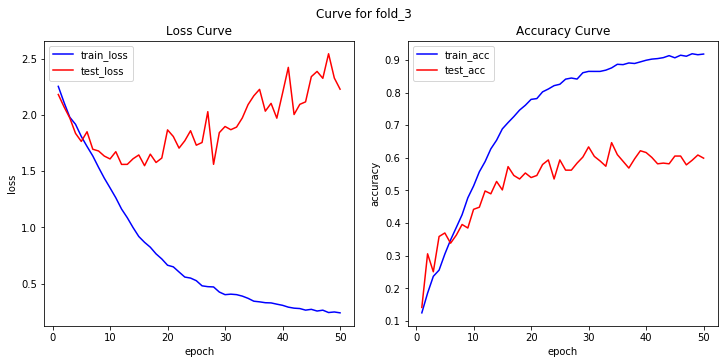

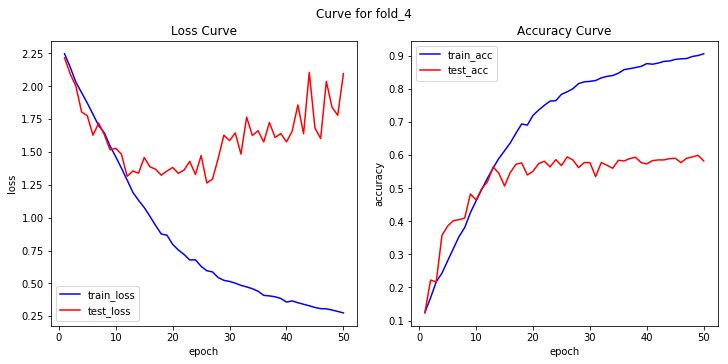

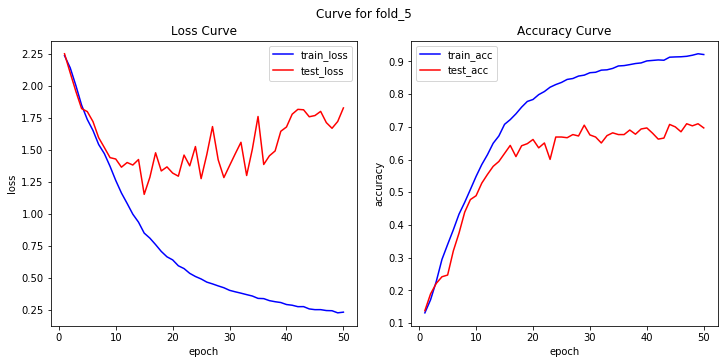

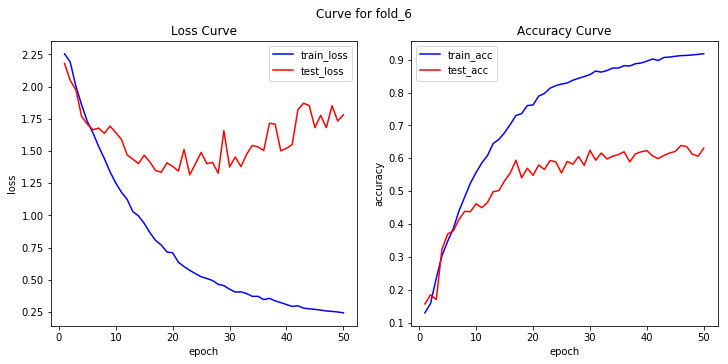

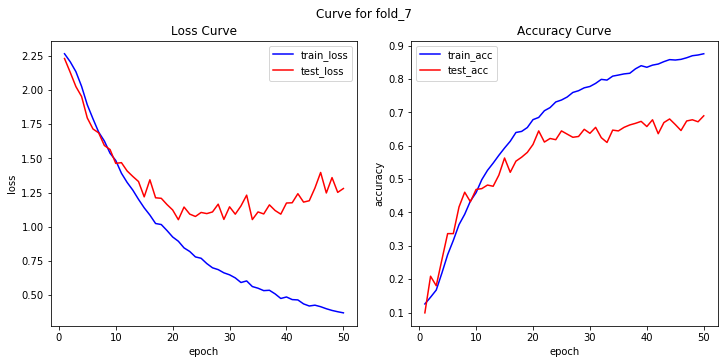

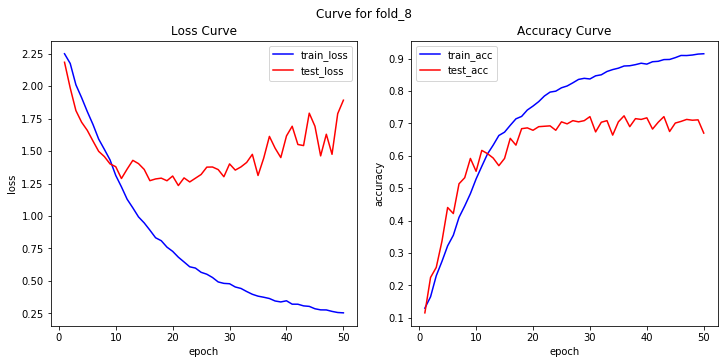

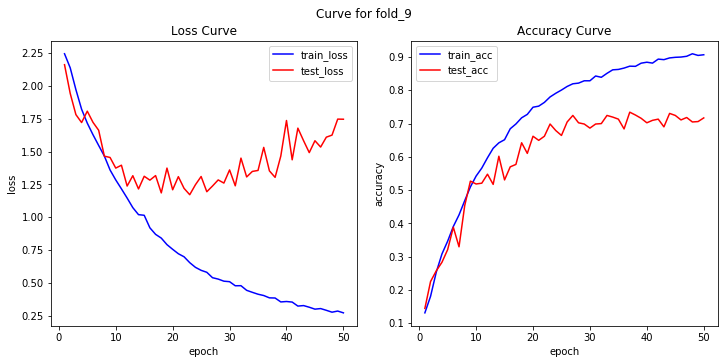

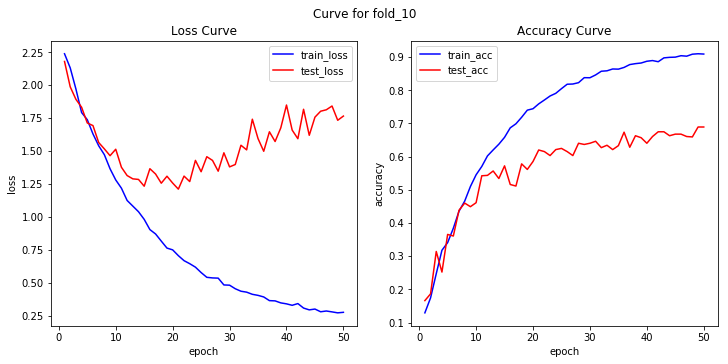

In [3]:
import matplotlib.pyplot as plt

SOURCE = '../log/CNN_Classifier_Layer_4_Epoch_50_sgd.log'

def extract_values(path):
    log_file = open(path, 'r')
    train = {}
    test = {}

    curr_train_loss = []
    curr_train_acc = []
    curr_test_loss = []
    curr_test_acc = []
    for line in log_file:
        items = line.strip().split()
        if len(items) == 17 and items[-2] == 'val_acc:':
            curr_train_loss.append(float(items[7]))
            curr_train_acc.append(float(items[10]))
            curr_test_loss.append(float(items[13]))
            curr_test_acc.append(float(items[16]))
        elif len(items) == 4 and items[0] == 'Cross':
            key = 'fold_' + items[-1]
            train[key + '_loss'] = curr_train_loss
            train[key + '_acc'] = curr_train_acc
            test[key + '_loss'] = curr_test_loss
            test[key + '_acc'] = curr_test_acc
            curr_train_loss = []
            curr_train_acc = []
            curr_test_loss = []
            curr_test_acc = []

    log_file.close()
    return train, test

def draw(train, test, fold):
    key = 'fold_' + str(fold)
    train_loss = train[key + '_loss']
    train_acc = train[key + '_acc']
    test_loss = test[key + '_loss']
    test_acc = test[key + '_acc']
    epoch = [elem for elem in range(1, len(train_loss) + 1)]

    fig, axs = plt.subplots(1, 2, figsize = (10, 5), constrained_layout = True)
    fig.suptitle('Curve for ' + key)

    axs[0].plot(epoch, train_loss, c = 'blue', label = 'train_loss')
    axs[0].plot(epoch, test_loss, c = 'red', label = 'test_loss')
    axs[0].set_title('Loss Curve')
    axs[0].set_ylabel('loss')
    axs[0].set_xlabel('epoch')
    axs[0].legend()

    axs[1].plot(epoch, train_acc, c = 'blue', label = 'train_acc')
    axs[1].plot(epoch, test_acc, c = 'red', label = 'test_acc')
    axs[1].set_title('Accuracy Curve')
    axs[1].set_ylabel('accuracy')
    axs[1].set_xlabel('epoch')
    axs[1].legend()

    plt.show()

def main():
    train, test = extract_values(SOURCE)
    for i in range(10):
        draw(train, test, i + 1)

if __name__ == '__main__':
    main()